In [16]:
import numpy as np
import pandas as pd
# settings to display all columns
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders.count import CountEncoder
from category_encoders.one_hot import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import eli5

In [2]:
def evaluate(estimator, X_tr, X_te, y_tr, y_te, cv=5, grid_search=False):
    '''
    
    '''
    if grid_search == False:
        # Cross-Validate
        output = cross_validate(estimator, X_tr, y_tr, cv=cv,
                                scoring=['accuracy', 'precision','recall', 'f1', 'roc_auc'])

        print('Results of Cross-Validation:\n')
        print(f'Average accuracy: {output["test_accuracy"].mean()}\
        +/- {output["test_accuracy"].std()}')
        print(f'Average precision: {output["test_precision"].mean()}\
        +/- {output["test_precision"].std()}')
        print(f'**Average recall: {output["test_recall"].mean()}\
        +/- {output["test_recall"].std()}')
        print(f'Average f1 score: {output["test_f1"].mean()}\
        +/- {output["test_f1"].std()}')
        print(f'Average roc_auc: {output["test_roc_auc"].mean()}\
        +/- {output["test_roc_auc"].std()}\n')
        print('+'*20)
    
        # Test Validate
        estimator.fit(X_tr, y_tr)
        tr_preds = estimator.predict(X_tr)
        te_preds = estimator.predict(X_te)

        categories = ['Functional', 'Non-Functional']
        print('\nResults of Train-Test Split Validation:')

        plot_confusion_matrix(estimator, X_te, y_te, display_labels= categories,
                              cmap='mako')

        print("\nTraining Scores:")
        print(f"Train accuracy: {accuracy_score(y_tr, tr_preds)}")
        print(f"Train precision: {precision_score(y_tr, tr_preds)}")
        print(f"**Train recall: {recall_score(y_tr, tr_preds)}")
        print(f"Train f1 score: {f1_score(y_tr, tr_preds)}")
        print(f"Train roc_auc: {roc_auc_score(y_tr, tr_preds)}\n")

        print("<>"*10)
        print("\nTesting Scores:")
        print(f"Test accuracy: {accuracy_score(y_te, te_preds)}")
        print(f"Test precision: {precision_score(y_te, te_preds)}")
        print(f"**Test recall: {recall_score(y_te, te_preds)}")
        print(f"Test f1 score: {f1_score(y_te, te_preds)}")
        print(f"Test roc_auc: {roc_auc_score(y_te, te_preds)}")
    
    else:
        estimator.fit(X_tr, y_tr)
        tr_preds = estimator.predict(X_tr)
        te_preds = estimator.predict(X_te)

        categories = ['Functional', 'Non-Functional']
        print('\nResults of Train-Test Split Validation:')

        plot_confusion_matrix(estimator, X_te, y_te, display_labels= categories,
                              cmap='mako')

        print("\nTraining Scores:")
        print(f"Train accuracy: {accuracy_score(y_tr, tr_preds)}")
        print(f"Train precision: {precision_score(y_tr, tr_preds)}")
        print(f"**Train recall: {recall_score(y_tr, tr_preds)}")
        print(f"Train f1 score: {f1_score(y_tr, tr_preds)}")
        print(f"Train roc_auc: {roc_auc_score(y_tr, tr_preds)}\n")

        print("<>"*10)
        print("\nTesting Scores:")
        print(f"Test accuracy: {accuracy_score(y_te, te_preds)}")
        print(f"Test precision: {precision_score(y_te, te_preds)}")
        print(f"**Test recall: {recall_score(y_te, te_preds)}")
        print(f"Test f1 score: {f1_score(y_te, te_preds)}")
        print(f"Test roc_auc: {roc_auc_score(y_te, te_preds)}")

In [3]:
df = pd.read_csv('../../data/data_cleaned.csv')

In [4]:
X = df.drop(columns='non_functional')
y = df['non_functional']

In [5]:
num_cols = []
sm_cat_cols = []
lg_cat_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 25:
        sm_cat_cols.append(c)
    else:
        lg_cat_cols.append(c)

In [6]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y,
                                                          test_size = .10, random_state = 396)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size = .25, random_state = 396)

In [7]:
# creating Pipelines for each column type:
# numeric, categorical with under 25 categories, categorical with over 25 categories

num_col_pipe = Pipeline(steps = [
    ('ii', IterativeImputer(random_state=396, add_indicator=True)),
    ('mm', MinMaxScaler())
])

sm_cat_col_pipe = Pipeline(steps = [
    ('ohe', OneHotEncoder(handle_unknown = 'indicator'))
])

lg_cat_col_pipe = Pipeline(steps = [
    ('count', CountEncoder(min_group_size=10, min_group_name='Other'))
])

In [8]:
preprocessor = ColumnTransformer(transformers=[
    ('numeric', num_col_pipe, num_cols),
    ('small_cat', sm_cat_col_pipe, sm_cat_cols),
    ('large_cat', lg_cat_col_pipe, lg_cat_cols )
])

In [17]:
pp = ColumnTransformer(transformers=[
    ('numeric', num_col_pipe, num_cols),
    ('small_cat', sm_cat_col_pipe, sm_cat_cols),
    ('large_cat', lg_cat_col_pipe, lg_cat_cols )
])
rf = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=100,  random_state=369)
pipe = 
pipe.fit(X_train, y_train);

KeyError: ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('ii',
                                                  IterativeImputer(add_indicator=True,
                                                                   random_state=396)),
                                                 ('mm', MinMaxScaler())]),
                                 ['id', 'amount_tsh', 'gps_height', 'longitude',
                                  'latitude', 'population',
                                  'construction_year']),
                                ('small_cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='indicator'))]),
                                 ['basin', 'region', 'scheme_management',
                                  'permit', 'extraction_type_class',
                                  'management_group', 'payment',
                                  'quality_group', 'quantity', 'source',
                                  'source_class', 'waterpoint_type_group']),
                                ('large_cat',
                                 Pipeline(steps=[('count',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_name='Other',
                                                               min_group_size=10))]),
                                 ['funder', 'installer', 'lga'])])

In [29]:
estimator_rf_best = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=100,  random_state=369))
])

Results of Cross-Validation:

Average accuracy: 0.8149737958572499        +/- 0.003961222343778333
Average precision: 0.8461435807672849        +/- 0.003972011236290002
**Average recall: 0.7272474221990363        +/- 0.008978221827099694
Average f1 score: 0.7821714162390789        +/- 0.005596031071483234
Average roc_auc: 0.8949406589234747        +/- 0.0017927355345901891

++++++++++++++++++++

Results of Train-Test Split Validation:

Training Scores:
Train accuracy: 0.9409034190167207
Train precision: 0.9789638177665585
**Train recall: 0.8897629192614444
Train f1 score: 0.9322344322344323
Train roc_auc: 0.936840658307436

<><><><><><><><><><>

Testing Scores:
Test accuracy: 0.8185221232312645
Test precision: 0.8481655691439323
**Test recall: 0.736
Test f1 score: 0.788111888111888
Test roc_auc: 0.8122063053097345


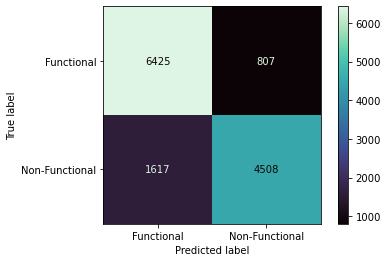

In [10]:
evaluate(estimator_rf_best, X_train, X_test, y_train, y_test, cv=5, grid_search=False)

In [31]:
estimator_rf_best.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('ii',
                                                                   IterativeImputer(add_indicator=True,
                                                                                    random_state=396)),
                                                                  ('mm',
                                                                   MinMaxScaler())]),
                                                  ['id', 'amount_tsh',
                                                   'gps_height', 'longitude',
                                                   'latitude', 'population',
                                                   'construction_year']),
                                                 ('small_cat',
                                                  Pipeline(steps=[('ohe',
                             

In [33]:
support = estimator_rf_best.named_steps['preprocessor'].support_

AttributeError: 'ColumnTransformer' object has no attribute 'support_'

In [18]:
eli5.explain_weights(rf, top=10)

Weight,Feature
0.0964 ± 0.0901,x87
0.0799 ± 0.0172,x4
0.0782 ± 0.0163,x3
0.0735 ± 0.0208,x6
0.0523 ± 0.0107,x0
0.0519 ± 0.0156,x2
0.0378 ± 0.0101,x115
0.0362 ± 0.0085,x5
0.0359 ± 0.0590,x110
0.0312 ± 0.0120,x117


In [23]:
eli5.show_weights(rf, vec=pp, top=10,
                  feature_names=X_train.columns)

ValueError: feature_names has a wrong length: expected=118, got=22